**Universidade Estadual de Campinas - Unicamp**

**Faculdade de Tecnologia - FT**

**Autor:** Ulisses Martins Dias

**Disciplina:** TT003 - Tópicos em Computação e Informática III

**Atividade 01:** Regressão

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ulissesdias/tt003/blob/main/atividades/2024/atividade01.ipynb)

## Função do Segundo Grau

Vamos agora realizar um experimento com alguns dados fabricados para esta tarefa. O objetivo será plotar uma curva do segundo grau, em outras palavras, uma curva do tipo $y = ax^2 + bx + c$.

A dificuldade agora é que temos três parâmetros livres que precisamos descobrir: $a$, $b$ e $c$. Em outras palavras, no seu código, você precisará de três loops encadeados. Perceba que este nosso método de encontrar oráculos é proibitivo quando o número de parâmetros aumenta. Entretanto, veja se você consegue obter os melhores valores de $a$, $b$ e $c$.

Primeiramente, vamos colocar no notebook as funções que você precisará

In [1]:
## Obtendo os dados
import pandas as pd
database = pd.read_csv("../dados/atv2024_01.csv", index_col = 0)
database.head()

,x,y
1,-4.693878,2.582525
2,5.918367,26.022487
3,2.244898,4.959562
4,8.367347,43.214062
5,-3.061224,4.567065


In [3]:
# Função que computa o erro do oráculo
def erro_quadratico_acumulado(oraculo) :
    # Obtendo as observações
    pontos_y = database.y.values
    pontos_x = database.x.values

    # Vamos concatenar os quadrados das distâncias
    # entre a espera real e a predita
    erro = 0
    for i in range(len(pontos_x)) :
        # Usando o oráculo para obter a predição.
        # Posteriormente, chamaremos isso de
        # passo forward.
        predicted = oraculo(pontos_x[i])

        # O erro é o quadrado da diferença entre
        # o que foi predito e o que estava no
        # banco de dados
        erro += (predicted - pontos_y[i])**2

    return erro

In [14]:
# Função que cria um gráfico do oráculo
import matplotlib.pyplot as plt
def plota_grafico(oraculo, with_error = False) :
    ## Plotando os pontos do banco de dados
    database.plot.scatter(x='x',
                          y='y')

    ## Criando um eixo X para plotar a reta
    eixo_x = range(int(min(database.x.values) - 1),int(max(database.x.values) + 1),2)
    eixo_y = []

    ## Gerando a resposta do oráculo
    for x in eixo_x :
        eixo_y.append(oraculo(x))

    ## Plotando a reta
    plt.plot(eixo_x, eixo_y, 'r--', label='Valores Obtidos')

    if (with_error) :

        ## Colocando barras verticais para evidenciar erros
        ## do oráculo
        pontos_y = database.y.values
        pontos_x = database.x.values
        for i in range(len(pontos_x)) :
            predicted = oraculo(pontos_x[i])
            plt.plot(
                (pontos_x[i], pontos_x[i]),
                (predicted, pontos_y[i]),
                '-', c = "black"
            )

Agora começa o seu trabalho, você deverá criar uma função que indique o valor do erro para um grupo de $a$, $b$ e $c$. Esta função é muito semelhante ao que foi visto em sala de aula, mas agora para três parâmetros.

In [9]:
def erro_quadratico_variando_a_b_c() :
    # Listas a serem retornadas.
    eixo_a = []
    eixo_b = []
    eixo_c = []
    eixo_erro = []

    # ToDo: Configure os mínimos e máximos de
    # a, b e c na sua busca
    min_a = -200
    max_a = 200

    min_b = -200
    max_b = 200

    min_c = -200
    max_c = 200

    ## ToDo: Configure o número de iterações. Note
    ## que valores altos levará a um tempo de espera
    ## muito longo, dado que faremos três laços aninhados.
    iter_a = 400
    iter_b = 400
    iter_c = 400

    for i in range(iter_a) :
        a = min_a + i * (max_a - min_a)/iter_a

        for j in range(iter_b) :
            b = min_b + j * (max_b - min_b)/iter_b

            for k in range(iter_c) :
                c = min_c + k * (max_c - min_c)/iter_c

                eixo_a.append(a)
                eixo_b.append(b)
                eixo_c.append(c)

                ## ToDo: crie o oráculo com os valores de a, b e c.
                oraculo = lambda x : a * (x**2) + b * x + c

                eixo_erro.append(erro_quadratico_acumulado(oraculo))

    return eixo_a, eixo_b, eixo_c, eixo_erro

eixo_a, eixo_b, eixo_c, eixo_erro = erro_quadratico_variando_a_b_c()

O próximo passo é econtrar os valores que minimizam o erro.

In [10]:
erro_minimo = None ## Um valor alto
a_minimo = None
b_minimo = None
c_minimo = None

## ToDo: pesquise pelo vetor eixo_erro qual o erro mínimo e
## coloque na variável erro_minimo.

## ToDo: encontre os valores de a, b e c que geram o erro mímimo e
## armazene nas variáveis a_minimo, b_minimo e c_minimo

for i in range(len(eixo_erro)) :
    if i == 0 or eixo_erro[i] < erro_minimo :
        a_minimo = eixo_a[i]
        b_minimo = eixo_b[i]
        c_minimo = eixo_c[i]

        erro_minimo = eixo_erro[i]

print(a_minimo, b_minimo, c_minimo, erro_minimo)

1.0 1.0 -16.0 11634.274318815038


Agora plote a curva que você encontrou em um gráfico. Em outras palavras, crie o quinto oráculo com os valores encontrados por você.

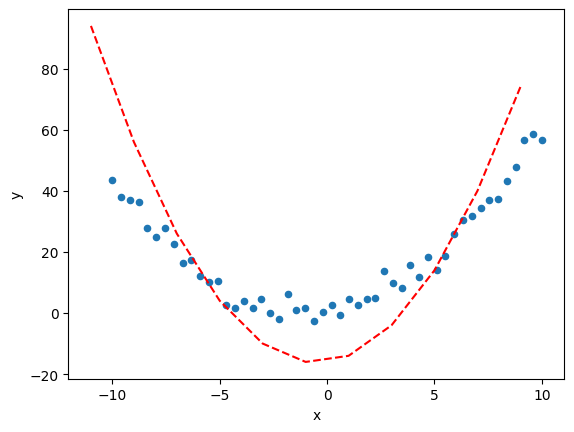

In [15]:
## ToDo: retorne os menores valores de a, b e c
def quinto_oraculo(x) :
    return a_minimo * (x**2) + b_minimo * x + c_minimo

plota_grafico(quinto_oraculo)